# Imports and Parameters

In [1]:
import pandas as pd
import numpy as np
import random
import pickle

from sklearn.model_selection import train_test_split

# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)

In [2]:
data_path = r"C:\Users\caleb\PycharmProjects\security_project\security_project\Data\extended_dike_modeling.p"

## Functions

In [3]:
def set_label(vec, grouping = "generic"):
    # If include_generic is True then we allow the usage of the "generic" label for malicious files
    # Otherwise, we exclude the generic label
    
    return_value = None
    if vec[0] == "benign":
        return_value = "benign"
    else:
        # Use the labels provided in the Dike dataset
        if grouping == "raw":
            possible_labels = vec[1:]
            lookup_dic = {
                0:"generic",
                1:"trojan",
                2:"ransomware",
                3:"worm",
                4:"backdoor",
                5:"spyware",
                6:"rootkit",
                7:"encrypter",
                8:"downloader"
            }
        # If the file is trojan, label as trojan. Otherwise, label as generic
        elif grouping == "generic":
            possible_labels = vec[1:]
            lookup_dic = {
                0:"generic",
                1:"trojan",
                2:"generic",
                3:"generic",
                4:"generic",
                5:"generic",
                6:"generic",
                7:"generic",
                8:"generic"
            }  
        # Use raw labels but exclude generic label when calculating classification
        elif grouping == "exclude_generic":
            possible_labels = vec[2:]
            lookup_dic = {
                0:"trojan",
                1:"ransomware",
                2:"worm",
                3:"backdoor",
                4:"spyware",
                5:"rootkit",
                6:"encrypter",
                7:"downloader"
            }            
            
        index_max = max(range(len(possible_labels)), key=possible_labels.__getitem__)
        
        return_value = lookup_dic[index_max]
            
    return return_value

# Get Data

In [4]:
base_df = pd.read_pickle(data_path)

In [5]:
base_df.head(3)

,hash,source,type,ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate,malice,generic,trojan,ransomware,worm,backdoor,spyware,rootkit,encrypter,downloader
0,012a50629c3cf1e2a2e5133b729c2ac7765cf4115187b1...,malware,0,1,dd7b1c66faa1bde0a42a868acafefcb3,332,224,271,6,0,36864,380928,0,5616,4096,40960,4194304,4096,4096,4,0,0,0,4,0,823296,4096,0,2,0,1048576,4096,1048576,4096,0,16,4,4.804751,0.707497,7.904654,104448.0,8192,360448,202528.5,14300,402506,4,62,0,0,5,3.041344,1.781496,6.505338,963.6,20,4264,0,0,None,0.934579,0.320000,0.560000,0.0,0.020000,0.0,0.0,0.0,0.100000,0.000000
1,018b4029f46e529da8dc57b8bc6245644ed59f63b4f8ea...,malware,0,1,6f6d36db833a383f3836639cad4ddbb1,332,224,271,7,0,24576,420539,397312,6469,4096,28672,4259840,4096,4096,4,0,0,0,4,0,856064,4096,518968,2,0,1048576,4096,1048576,4096,0,16,4,5.768973,2.662357,7.637939,112640.0,16384,376832,211277.5,20756,415160,5,85,0,0,4,5.667223,1.919241,7.95996,8029.5,20,16936,0,0,None,0.923077,0.493506,0.415584,0.0,0.012987,0.0,0.0,0.0,0.077922,0.000000
2,01a0bea806384827759ae032031516bfe843285cac3980...,malware,0,1,4f105bf3461951a61a770ff1c9577107,332,224,271,7,0,20480,390466,430080,5873,4096,24576,4259840,4096,4096,4,0,0,0,4,0,856064,4096,437261,2,0,1048576,4096,1048576,4096,0,16,4,7.212979,6.636076,7.876911,104448.0,20480,262144,210782.75,20164,532664,4,63,0,0,4,5.648782,1.919241,7.961305,7916.75,20,16936,0,0,None,0.931298,0.452055,0.397260,0.0,0.000000,0.0,0.0,0.0,0.123288,0.027397


In [6]:
base_df["source"].unique()

array(['malware', 'benign'], dtype=object)

## Label

In [7]:
base_df["label"] = base_df[["source","generic","trojan","ransomware","worm","backdoor","spyware","rootkit","encrypter","downloader"]].apply(set_label, grouping = "generic", axis=1)

In [8]:
base_df["raw_label"] = base_df[["source","generic","trojan","ransomware","worm","backdoor","spyware","rootkit","encrypter","downloader"]].apply(set_label, grouping = "raw", axis=1)

In [9]:
base_df.head()

,hash,source,type,ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate,malice,generic,trojan,ransomware,worm,backdoor,spyware,rootkit,encrypter,downloader,label,raw_label
0,012a50629c3cf1e2a2e5133b729c2ac7765cf4115187b1...,malware,0,1,dd7b1c66faa1bde0a42a868acafefcb3,332,224,271,6,0,36864,380928,0,5616,4096,40960,4194304,4096,4096,4,0,0,0,4,0,823296,4096,0,2,0,1048576,4096,1048576,4096,0,16,4,4.804751,0.707497,7.904654,104448.0,8192,360448,202528.5,14300,402506,4,62,0,0,5,3.041344,1.781496,6.505338,963.6,20,4264,0,0,None,0.934579,0.320000,0.560000,0.0,0.020000,0.0,0.0,0.0,0.100000,0.000000,trojan,trojan
1,018b4029f46e529da8dc57b8bc6245644ed59f63b4f8ea...,malware,0,1,6f6d36db833a383f3836639cad4ddbb1,332,224,271,7,0,24576,420539,397312,6469,4096,28672,4259840,4096,4096,4,0,0,0,4,0,856064,4096,518968,2,0,1048576,4096,1048576,4096,0,16,4,5.768973,2.662357,7.637939,112640.0,16384,376832,211277.5,20756,415160,5,85,0,0,4,5.667223,1.919241,7.95996,8029.5,20,16936,0,0,None,0.923077,0.493506,0.415584,0.0,0.012987,0.0,0.0,0.0,0.077922,0.000000,generic,generic
2,01a0bea806384827759ae032031516bfe843285cac3980...,malware,0,1,4f105bf3461951a61a770ff1c9577107,332,224,271,7,0,20480,390466,430080,5873,4096,24576,4259840,4096,4096,4,0,0,0,4,0,856064,4096,437261,2,0,1048576,4096,1048576,4096,0,16,4,7.212979,6.636076,7.876911,104448.0,20480,262144,210782.75,20164,532664,4,63,0,0,4,5.648782,1.919241,7.961305,7916.75,20,16936,0,0,None,0.931298,0.452055,0.397260,0.0,0.000000,0.0,0.0,0.0,0.123288,0.027397,generic,generic
3,01a795638fe5829264455b8efe4c1dbb52d74b8fadf17c...,malware,0,1,03d3825906e4ad8e2b39764bd101f1a5,332,224,271,6,0,36864,380928,0,5616,4096,40960,4194304,4096,4096,4,0,0,0,4,0,823296,4096,0,2,0,1048576,4096,1048576,4096,0,16,4,4.804191,0.709834,7.904686,104448.0,8192,360448,202528.5,14300,402506,4,62,0,0,5,3.040498,1.781496,6.501108,963.6,20,4264,0,0,None,0.927536,0.447761,0.462687,0.0,0.014925,0.0,0.0,0.0,0.074627,0.000000,trojan,trojan
4,01ca2135cdc41c49a873dbcb4299658480b85475b43ca5...,malware,0,1,060188d2f8b1e02de51a406e2bbad912,332,224,8450,8,0,143360,61440,0,77738,4096,147456,1677721600,4096,4096,4,0,0,0,4,0,225280,4096,268692,2,320,1048576,4096,1048576,4096,0,16,5,4.640248,2.597247,6.644364,40960.0,4096,143360,41468.8,1364,139980,7,114,0,2,5,2.530489,1.078755,4.655421,206.8,44,748,72,0,None,0.882353,0.527778,0.472222,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,generic,generic


In [10]:
base_df.tail()

,hash,source,type,ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate,malice,generic,trojan,ransomware,worm,backdoor,spyware,rootkit,encrypter,downloader,label,raw_label
6973,ff3a27c79a9938205bb158f87c020fa24a42612c8b6b0c...,benign,0,1,48fd1f2feea027258c14817d406d36ca,332,224,258,14,10,24064,181760,0,23209,4096,28672,4194304,4096,512,6,1,0,0,6,1,229376,1024,266882,2,33088,1048576,4096,1048576,4096,0,16,7,3.249526,0.020393,6.34589,29476.571429,512,168960,29250.142857,9,168468,12,87,1,0,26,2.082045,1.003255,7.361097,6426.0,296,38056,104,0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,benign
6974,ff6d6d846bb0ef538a95836a52e6187c855cbf93e2fce3...,benign,0,1,5594c639e1f05be647e4ad7d759a76cb,34404,240,39,2,27,32768,62976,3072,5328,4096,0,4194304,4096,512,4,0,0,0,5,2,98304,1024,91437,2,0,2097152,4096,1048576,4096,0,16,11,2.727398,0.0,5.956315,5771.636364,0,32768,5780.727273,20,32648,13,295,0,0,5,4.102803,2.29162,5.400754,923.0,34,1384,0,0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,benign
6975,ff9ef3f71807789ab7387c00020b61f7c7ffdcbd7f55d5...,benign,0,1,e9fc9485a227a12bbacfff46ab981a8c,34404,240,34,10,10,43008,25088,0,39532,4096,0,5368709120,4096,512,6,2,6,2,6,1,86016,1024,75585,3,33120,524288,8192,1048576,4096,0,16,6,3.594537,2.249446,5.626451,8789.333333,512,43008,11065.333333,492,42644,7,104,8,0,1,3.530351,3.530351,3.530351,952.0,952,952,112,0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,benign
6976,ffb860e143e71b639ce6e78afc0a4e120714fcffbbc811...,benign,0,1,7434484d8f99ee683747869a9d1b7e2e,332,224,258,9,0,1313792,355328,0,977340,4096,1318912,4194304,4096,512,5,0,0,0,5,0,1691648,1024,1692558,2,33088,1048576,4096,1048576,4096,0,16,6,4.453642,0.0,6.583298,278186.666667,512,1313792,279144.5,2,1313707,23,709,54,1,20,3.104987,0.960953,5.06424,1156.85,42,9640,72,0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,benign
6977,fffadeda975e01bb25fddcc63670cb1b73082db4addc58...,benign,0,1,3274647ebeb58c8666b131727a8906f0,332,224,258,9,0,388608,105472,0,193962,4096,4096,4194304,4096,512,5,0,0,0,5,0,704512,1024,532160,3,33088,1048576,4096,1048576,4096,0,16,7,3.815004,0.0,6.239861,70582.857143,0,388608,98230.857143,1148,388289,2,100,0,0,2,4.092627,3.389281,4.795974,493.0,346,640,0,0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,benign


In [11]:
base_df.groupby("label")["hash"].nunique()

label
benign      962
generic    1778
trojan     4238
Name: hash, dtype: int64

    If we exclude Generic, the data size for the other malicious file types are not large enough for modeling 
    
    So we will focus on the differences between modeling for a trojan file vs a "generic" malicious file

## Clean for Modeling

In [12]:
# Look for columns with no or little unique values - could exclude
for col in base_df.columns.values:
    nunique = base_df[col].nunique()
    if nunique < 5:
        print(f"{col} has {nunique} unique values")

source has 2 unique values
type has 1 unique values
ID has 1 unique values
Machine has 3 unique values
SizeOfOptionalHeader has 2 unique values
SectionAlignment has 4 unique values
FileAlignment has 3 unique values
Subsystem has 3 unique values
SizeOfHeapReserve has 4 unique values
SizeOfHeapCommit has 3 unique values
LoaderFlags has 2 unique values
NumberOfRvaAndSizes has 2 unique values
VersionInformationSize has 1 unique values
legitimate has 0 unique values
label has 3 unique values
raw_label has 4 unique values


In [13]:
base_df.columns.values

array(['hash', 'source', 'type', 'ID', 'md5', 'Machine',
       'SizeOfOptionalHeader', 'Characteristics', 'MajorLinkerVersion',
       'MinorLinkerVersion', 'SizeOfCode', 'SizeOfInitializedData',
       'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode',
       'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment',
       'MajorOperatingSystemVersion', 'MinorOperatingSystemVersion',
       'MajorImageVersion', 'MinorImageVersion', 'MajorSubsystemVersion',
       'MinorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders',
       'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes',
       'SectionsNb', 'SectionsMeanEntropy', 'SectionsMinEntropy',
       'SectionsMaxEntropy', 'SectionsMeanRawsize', 'SectionsMinRawsize',
       'SectionMaxRawsize', 'SectionsMeanVirtualsize',
       'SectionsMinVirtualsize', 'SectionMaxVirtualsize', 'ImportsNbD

In [14]:
modeling_data = base_df.drop(columns=[
    "source","type","ID","VersionInformationSize","legitimate","malice"
    ,"generic","trojan","ransomware","worm","backdoor","spyware","rootkit","encrypter","downloader"
])

In [15]:
modeling_data = modeling_data.rename(columns={
    "hash":"hash_ID"
})

In [16]:
modeling_data.head(1)

,hash_ID,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,label,raw_label
0,012a50629c3cf1e2a2e5133b729c2ac7765cf4115187b1...,dd7b1c66faa1bde0a42a868acafefcb3,332,224,271,6,0,36864,380928,0,5616,4096,40960,4194304,4096,4096,4,0,0,0,4,0,823296,4096,0,2,0,1048576,4096,1048576,4096,0,16,4,4.804751,0.707497,7.904654,104448.0,8192,360448,202528.5,14300,402506,4,62,0,0,5,3.041344,1.781496,6.505338,963.6,20,4264,0,trojan,trojan


## Check Data Types 

In [17]:
for col in modeling_data.columns.values:
    d_type = type(modeling_data[col].values[0])
    if str(d_type) == "<class 'str'>":
        print(col,":",d_type)

hash_ID : <class 'str'>
md5 : <class 'str'>
label : <class 'str'>
raw_label : <class 'str'>


In [18]:
modeling_data["md5"].nunique()

6978

In [19]:
modeling_data["hash_ID"].nunique()

6978

    We can drop the md5

In [20]:
modeling_data = modeling_data.drop(columns=["md5"])

## Split Generic/Trojan

In [21]:
modeling_data["is_malicious"] = np.where(
    modeling_data["label"] == "benign"
    ,False
    ,True
)

In [22]:
modeling_data.head(3)

,hash_ID,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,label,raw_label,is_malicious
0,012a50629c3cf1e2a2e5133b729c2ac7765cf4115187b1...,332,224,271,6,0,36864,380928,0,5616,4096,40960,4194304,4096,4096,4,0,0,0,4,0,823296,4096,0,2,0,1048576,4096,1048576,4096,0,16,4,4.804751,0.707497,7.904654,104448.0,8192,360448,202528.5,14300,402506,4,62,0,0,5,3.041344,1.781496,6.505338,963.6,20,4264,0,trojan,trojan,True
1,018b4029f46e529da8dc57b8bc6245644ed59f63b4f8ea...,332,224,271,7,0,24576,420539,397312,6469,4096,28672,4259840,4096,4096,4,0,0,0,4,0,856064,4096,518968,2,0,1048576,4096,1048576,4096,0,16,4,5.768973,2.662357,7.637939,112640.0,16384,376832,211277.5,20756,415160,5,85,0,0,4,5.667223,1.919241,7.95996,8029.5,20,16936,0,generic,generic,True
2,01a0bea806384827759ae032031516bfe843285cac3980...,332,224,271,7,0,20480,390466,430080,5873,4096,24576,4259840,4096,4096,4,0,0,0,4,0,856064,4096,437261,2,0,1048576,4096,1048576,4096,0,16,4,7.212979,6.636076,7.876911,104448.0,20480,262144,210782.75,20164,532664,4,63,0,0,4,5.648782,1.919241,7.961305,7916.75,20,16936,0,generic,generic,True


In [23]:
modeling_generic = modeling_data[modeling_data["label"].isin(["benign","generic"])]
modeling_generic = modeling_generic.drop(columns=["label","raw_label"])

In [24]:
# modeling_generic.isnull().sum()

In [25]:
modeling_trojan = modeling_data[modeling_data["label"].isin(["benign","trojan"])]
modeling_trojan = modeling_trojan.drop(columns=["label","raw_label"])

In [26]:
# modeling_trojan.isnull().sum()

# Prepare for Modeling

## Generic

In [27]:
generic_labels = np.array(modeling_generic['is_malicious'])

In [28]:
generic_features= modeling_generic.drop(columns=['hash_ID','is_malicious'], axis = 1)

In [29]:
generic_feature_list = list(generic_features.columns)

In [30]:
generic_features = np.array(generic_features)

## Trojan

In [31]:
trojan_labels = np.array(modeling_trojan['is_malicious'])

In [32]:
trojan_features= modeling_trojan.drop(columns=['hash_ID','is_malicious'], axis = 1)

In [33]:
trojan_feature_list = list(trojan_features.columns)

In [34]:
trojan_features = np.array(trojan_features)

# Split Train/Test

In [35]:
generic_train_features, generic_test_features, generic_train_labels, generic_test_labels = \
train_test_split(generic_features, generic_labels, test_size = 0.25, random_state = 1202)

In [36]:
trojan_train_features, trojan_test_features, trojan_train_labels, trojan_test_labels = \
train_test_split(trojan_features, trojan_labels, test_size = 0.25, random_state = 1202)

# Create the Models

## Generic

In [37]:
%%time
generic_rf = RandomForestClassifier(n_estimators = 100, random_state = 1202)

Wall time: 0 ns


In [38]:
%%time
generic_rf.fit(generic_train_features, generic_train_labels)

Wall time: 303 ms


RandomForestClassifier(random_state=1202)

## Trojan

In [39]:
%%time
trojan_rf = RandomForestClassifier(n_estimators = 100, random_state = 1202)

Wall time: 0 ns


In [40]:
%%time
trojan_rf.fit(trojan_train_features, trojan_train_labels)

Wall time: 441 ms


RandomForestClassifier(random_state=1202)

# Test Models

## Generic

In [41]:
# Test Generic Model on Generic Data
generic_predictions = generic_rf.predict(generic_test_features)

# Test Generic Model on Trojan Data 
# generic_predictions = generic_rf.predict(trojan_test_features)

In [42]:
len(generic_predictions) == len(generic_test_labels)

True

In [43]:
len(generic_predictions)

685

In [44]:
correct = 0
wrong = []
for i in range(len(generic_predictions)):
    if generic_predictions[i] == generic_test_labels[i]:
        correct += 1
    else:
        wrong.append([generic_test_labels[i],generic_predictions[i]])

In [45]:
percent_correct = round((correct/len(generic_predictions))*100,2)

In [46]:
correct

681

In [47]:
percent_correct

99.42

In [48]:
flagged_benign = 0
ignored_malicious = 0
for bad_prediction in wrong:
    if (bad_prediction[0] == 1) & (bad_prediction[1] == 0):
        ignored_malicious += 1
    elif (bad_prediction[0] == 0) & (bad_prediction[1] == 1):
        flagged_benign += 1
    else:
        print("ISSUE: ", bad_prediction)
        break

In [49]:
print(f"Accuracy of Classifier is: {percent_correct}%")
print(f"There were {len(wrong)} units wrongly classified out of {len(generic_predictions)}")
print(f"We flagged {flagged_benign} benign files and let {ignored_malicious} malicious files slip by")

Accuracy of Classifier is: 99.42%
There were 4 units wrongly classified out of 685
We flagged 4 benign files and let 0 malicious files slip by


## Trojan

In [50]:
# Test Trojan Model on Trojan Data
trojan_predictions = trojan_rf.predict(trojan_test_features)

# Test Trojan Model on Generic Data
# trojan_predictions = trojan_rf.predict(generic_test_features)

In [51]:
len(trojan_predictions) == len(trojan_test_labels)

True

In [52]:
len(trojan_predictions)

1300

In [53]:
correct = 0
wrong = []
for i in range(len(trojan_predictions)):
    if trojan_predictions[i] == trojan_test_labels[i]:
        correct += 1
    else:
        wrong.append([trojan_test_labels[i],trojan_predictions[i]])

In [54]:
percent_correct = round((correct/len(trojan_predictions))*100,2)

In [55]:
correct

1298

In [56]:
percent_correct

99.85

In [57]:
flagged_benign = 0
ignored_malicious = 0
for bad_prediction in wrong:
    if (bad_prediction[0] == 1) & (bad_prediction[1] == 0):
        ignored_malicious += 1
    elif (bad_prediction[0] == 0) & (bad_prediction[1] == 1):
        flagged_benign += 1
    else:
        print("ISSUE: ", bad_prediction)
        break

In [58]:
print(f"Accuracy of Classifier is: {percent_correct}%")
print(f"There were {len(wrong)} units wrongly classified out of {len(trojan_predictions)}")
print(f"We flagged {flagged_benign} benign files and let {ignored_malicious} malicious files slip by")

Accuracy of Classifier is: 99.85%
There were 2 units wrongly classified out of 1300
We flagged 0 benign files and let 2 malicious files slip by


# Feature Importance

## Generic

In [59]:
# Get numerical feature importances
generic_importances = list(generic_rf.feature_importances_)
# List of tuples with variable and importance
generic_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(generic_feature_list, generic_importances)]
# Sort the feature importances by most important first
generic_feature_importances = sorted(generic_feature_importances, key = lambda x: x[1], reverse = True)
generic_feature_importances_df = pd.DataFrame(generic_feature_importances,columns=["feature","generic_feature_importance"])

In [60]:
generic_feature_importances_df.head(10)

,feature,generic_feature_importance
0,SectionsMaxEntropy,0.16
1,DllCharacteristics,0.09
2,SizeOfImage,0.07
3,SizeOfOptionalHeader,0.06
4,BaseOfData,0.06
5,SectionMaxVirtualsize,0.06
6,SectionMaxRawsize,0.05
7,Subsystem,0.04
8,SectionsMeanRawsize,0.04
9,Machine,0.03


## Trojan

In [61]:
# Get numerical feature importances
trojan_importances = list(trojan_rf.feature_importances_)
# List of tuples with variable and importance
trojan_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(trojan_feature_list, trojan_importances)]
# Sort the feature importances by most important first
trojan_feature_importances = sorted(trojan_feature_importances, key = lambda x: x[1], reverse = True)
trojan_feature_importances_df = pd.DataFrame(trojan_feature_importances,columns=["feature","trojan_feature_importance"])

In [62]:
trojan_feature_importances_df.head(10)

,feature,trojan_feature_importance
0,SectionsMaxEntropy,0.12
1,SizeOfImage,0.09
2,BaseOfData,0.07
3,DllCharacteristics,0.07
4,SizeOfOptionalHeader,0.06
5,Subsystem,0.06
6,MajorSubsystemVersion,0.05
7,SectionMaxRawsize,0.05
8,SectionMaxVirtualsize,0.05
9,Machine,0.03


In [63]:
trojan_feature_importances_df.to_pickle("trojan_feature_importance.p")

## Comapre

In [64]:
output_df = pd.merge(generic_feature_importances_df,trojan_feature_importances_df,on='feature')

In [65]:
output_df.head(2)

,feature,generic_feature_importance,trojan_feature_importance
0,SectionsMaxEntropy,0.16,0.12
1,DllCharacteristics,0.09,0.07


In [66]:
output_df["Delta"] = abs(output_df["generic_feature_importance"] - output_df["trojan_feature_importance"])

In [67]:
output_df = output_df.sort_values(by="Delta",ascending=False)

In [68]:
output_df.head(10)

,feature,generic_feature_importance,trojan_feature_importance,Delta
0,SectionsMaxEntropy,0.16,0.12,0.04
11,MajorSubsystemVersion,0.02,0.05,0.03
8,SectionsMeanRawsize,0.04,0.02,0.02
7,Subsystem,0.04,0.06,0.02
2,SizeOfImage,0.07,0.09,0.02
1,DllCharacteristics,0.09,0.07,0.02
4,BaseOfData,0.06,0.07,0.01
51,ResourcesMinSize,0.00,0.01,0.01
50,ResourcesMeanSize,0.00,0.01,0.01
49,ResourcesMinEntropy,0.00,0.01,0.01


# Trojan + Generic Classifier

In [69]:
modeling_data.head(3)

,hash_ID,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,label,raw_label,is_malicious
0,012a50629c3cf1e2a2e5133b729c2ac7765cf4115187b1...,332,224,271,6,0,36864,380928,0,5616,4096,40960,4194304,4096,4096,4,0,0,0,4,0,823296,4096,0,2,0,1048576,4096,1048576,4096,0,16,4,4.804751,0.707497,7.904654,104448.0,8192,360448,202528.5,14300,402506,4,62,0,0,5,3.041344,1.781496,6.505338,963.6,20,4264,0,trojan,trojan,True
1,018b4029f46e529da8dc57b8bc6245644ed59f63b4f8ea...,332,224,271,7,0,24576,420539,397312,6469,4096,28672,4259840,4096,4096,4,0,0,0,4,0,856064,4096,518968,2,0,1048576,4096,1048576,4096,0,16,4,5.768973,2.662357,7.637939,112640.0,16384,376832,211277.5,20756,415160,5,85,0,0,4,5.667223,1.919241,7.95996,8029.5,20,16936,0,generic,generic,True
2,01a0bea806384827759ae032031516bfe843285cac3980...,332,224,271,7,0,20480,390466,430080,5873,4096,24576,4259840,4096,4096,4,0,0,0,4,0,856064,4096,437261,2,0,1048576,4096,1048576,4096,0,16,4,7.212979,6.636076,7.876911,104448.0,20480,262144,210782.75,20164,532664,4,63,0,0,4,5.648782,1.919241,7.961305,7916.75,20,16936,0,generic,generic,True


In [70]:
modeling_data = modeling_data.drop(columns=["label","is_malicious","hash_ID"])

In [71]:
labels = np.array(modeling_data['raw_label'])

In [72]:
features= modeling_data.drop(columns=['raw_label'], axis = 1)

In [73]:
feature_list = list(features.columns)

In [74]:
feature_list

['Machine',
 'SizeOfOptionalHeader',
 'Characteristics',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode',
 'BaseOfData',
 'ImageBase',
 'SectionAlignment',
 'FileAlignment',
 'MajorOperatingSystemVersion',
 'MinorOperatingSystemVersion',
 'MajorImageVersion',
 'MinorImageVersion',
 'MajorSubsystemVersion',
 'MinorSubsystemVersion',
 'SizeOfImage',
 'SizeOfHeaders',
 'CheckSum',
 'Subsystem',
 'DllCharacteristics',
 'SizeOfStackReserve',
 'SizeOfStackCommit',
 'SizeOfHeapReserve',
 'SizeOfHeapCommit',
 'LoaderFlags',
 'NumberOfRvaAndSizes',
 'SectionsNb',
 'SectionsMeanEntropy',
 'SectionsMinEntropy',
 'SectionsMaxEntropy',
 'SectionsMeanRawsize',
 'SectionsMinRawsize',
 'SectionMaxRawsize',
 'SectionsMeanVirtualsize',
 'SectionsMinVirtualsize',
 'SectionMaxVirtualsize',
 'ImportsNbDLL',
 'ImportsNb',
 'ImportsNbOrdinal',
 'ExportNb',
 'ResourcesNb',
 'ResourcesMeanEntropy',
 'Resour

In [75]:
features = np.array(features)

In [76]:
train_features, test_features, train_labels, test_labels = \
train_test_split(features, labels, test_size = 0.25, random_state = 1202)

In [77]:
%%time
rf = RandomForestClassifier(n_estimators = 100, random_state = 1202)

Wall time: 0 ns


In [78]:
%%time
rf.fit(train_features, train_labels)

Wall time: 861 ms


RandomForestClassifier(random_state=1202)

In [79]:
# Save
with open('master_model', 'wb') as f:
    pickle.dump(rf, f)

In [80]:
predictions = rf.predict(test_features)

In [81]:
correct = 0
wrong = []
for i in range(len(predictions)):
    if predictions[i] == test_labels[i]:
        correct += 1
    else:
        wrong.append([test_labels[i],predictions[i]])

In [82]:
percent_correct = round((correct/len(predictions))*100,2)

In [83]:
correct

1450

In [84]:
percent_correct

83.09

In [85]:
test_labels

array(['trojan', 'generic', 'trojan', ..., 'generic', 'trojan', 'benign'],
      dtype=object)

In [86]:
output = pd.DataFrame(list(test_labels),columns=["Labels"])

In [87]:
output["Predictions"] = predictions

In [88]:
output.groupby(["Labels","Predictions"]).size().reset_index(name="File Count")

,Labels,Predictions,File Count
0,benign,benign,220
1,benign,generic,2
2,generic,benign,9
3,generic,generic,288
4,generic,trojan,164
5,trojan,benign,1
6,trojan,generic,119
7,trojan,trojan,939
8,worm,worm,3


In [89]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances_df = pd.DataFrame(feature_importances,columns=["feature","feature_importance"])

In [90]:
feature_importances_df

,feature,feature_importance
0,SectionsMaxEntropy,0.11
1,SectionsMeanEntropy,0.09
2,CheckSum,0.07
3,ResourcesMeanEntropy,0.05
4,BaseOfData,0.04
5,ResourcesMaxEntropy,0.04
6,SizeOfOptionalHeader,0.03
7,AddressOfEntryPoint,0.03
8,SizeOfImage,0.03
9,SectionsMinEntropy,0.03


# Look At Trojan Tree

In [91]:
len(trojan_rf.estimators_)

100

In [92]:
# Get a "Tree" from the "Forest"
trojan_tree = trojan_rf.estimators_[random.randrange(0, 99)]

In [93]:
trojan_file_number = random.randrange(0, len(trojan_test_features))

In [94]:
trojan_file_number

240

In [95]:
trojan_test_features[trojan_file_number]

array([332, 224, 271, 7, 0, 20480, 423234, 397312, 6021, 4096, 24576,
       4259840, 4096, 4096, 4, 0, 0, 0, 4, 0, 856064, 4096, 475168, 2, 0,
       1048576, 4096, 1048576, 4096, 0, 16, 4, 7.084863991915136,
       6.594503575437424, 7.686466180426896, 112640.0, 20480, 294912,
       211875.25, 20308, 693208, 5, 69, 0, 0, 4, 5.637227283262883,
       1.919240704636849, 7.965527473937086, 7916.75, 20, 16936, 0],
      dtype=object)

In [96]:
trojan_test_labels[trojan_file_number]

True

In [97]:
list(trojan_test_features[trojan_file_number])

[332,
 224,
 271,
 7,
 0,
 20480,
 423234,
 397312,
 6021,
 4096,
 24576,
 4259840,
 4096,
 4096,
 4,
 0,
 0,
 0,
 4,
 0,
 856064,
 4096,
 475168,
 2,
 0,
 1048576,
 4096,
 1048576,
 4096,
 0,
 16,
 4,
 7.084863991915136,
 6.594503575437424,
 7.686466180426896,
 112640.0,
 20480,
 294912,
 211875.25,
 20308,
 693208,
 5,
 69,
 0,
 0,
 4,
 5.637227283262883,
 1.919240704636849,
 7.965527473937086,
 7916.75,
 20,
 16936,
 0]

In [98]:
[trojan_test_labels[trojan_file_number]]

[True]

In [99]:
trojan_test_labels

array([False,  True,  True, ..., False,  True, False])

In [100]:
# Export as dot file
export_graphviz(trojan_tree, out_file='tree.dot', 
                feature_names = trojan_feature_list,
                class_names = ["True", "False"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

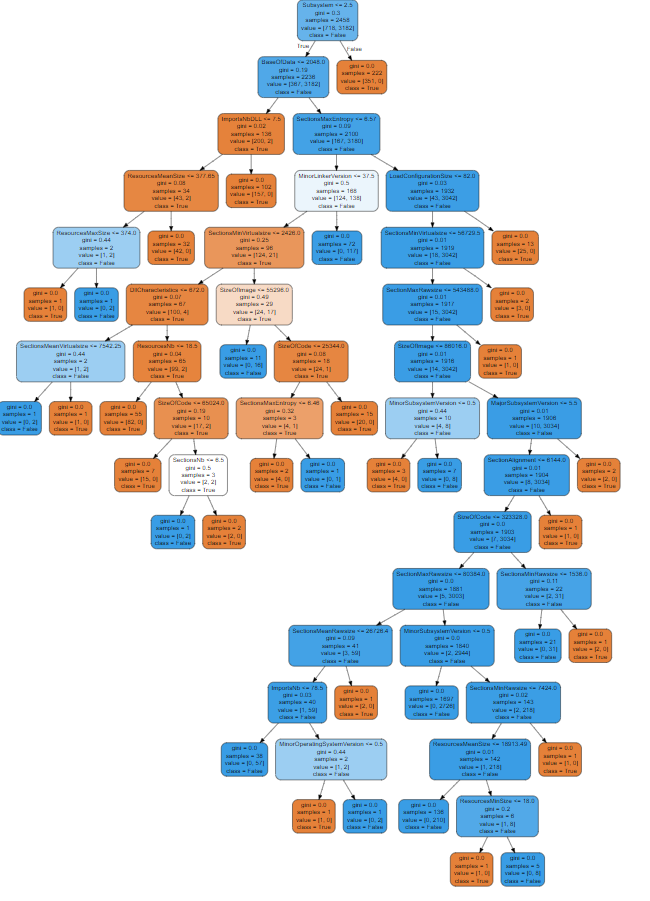

# Feature Reduction - Trojan

In [101]:
modeling_trojan.head(2)

,hash_ID,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,is_malicious
0,012a50629c3cf1e2a2e5133b729c2ac7765cf4115187b1...,332,224,271,6,0,36864,380928,0,5616,4096,40960,4194304,4096,4096,4,0,0,0,4,0,823296,4096,0,2,0,1048576,4096,1048576,4096,0,16,4,4.804751,0.707497,7.904654,104448.0,8192,360448,202528.5,14300,402506,4,62,0,0,5,3.041344,1.781496,6.505338,963.6,20,4264,0,True
3,01a795638fe5829264455b8efe4c1dbb52d74b8fadf17c...,332,224,271,6,0,36864,380928,0,5616,4096,40960,4194304,4096,4096,4,0,0,0,4,0,823296,4096,0,2,0,1048576,4096,1048576,4096,0,16,4,4.804191,0.709834,7.904686,104448.0,8192,360448,202528.5,14300,402506,4,62,0,0,5,3.040498,1.781496,6.501108,963.6,20,4264,0,True


## Principal Component Analysis (PCA)

In [102]:
trojan_labels = np.array(modeling_trojan['is_malicious'])

In [103]:
modeling_trojan = modeling_trojan.drop(columns=["hash_ID","is_malicious"])

In [104]:
modeling_trojan.shape

(5200, 53)

In [105]:
scaler = MinMaxScaler()

In [106]:
modeling_trojan_scaled = scaler.fit_transform(modeling_trojan)

In [107]:
# Cover 95% of variance
pca = PCA(n_components = 0.95)
pca.fit(modeling_trojan_scaled)
trojan_reduced = pca.transform(modeling_trojan_scaled)

In [108]:
len(trojan_reduced)

5200

In [109]:
len(trojan_reduced[0])

14

In [110]:
pqa_columns = [f"principal component {x}" for x in range(len(trojan_reduced[0]))]

In [111]:
trojan_principalDf = pd.DataFrame(data = trojan_reduced
             , columns = pqa_columns)

In [112]:
trojan_principalDf.shape

(5200, 14)

## Model with reduced DF

In [113]:
trojan_features = np.array(trojan_principalDf)

In [114]:
trojan_train_features, trojan_test_features, trojan_train_labels, trojan_test_labels = \
train_test_split(trojan_features, trojan_labels, test_size = 0.25, random_state = 1202)

In [115]:
%%time
trojan_rf = RandomForestClassifier(n_estimators = 100, random_state = 1202)

Wall time: 0 ns


In [116]:
%%time
trojan_rf.fit(trojan_train_features, trojan_train_labels)

Wall time: 581 ms


RandomForestClassifier(random_state=1202)

In [117]:
trojan_predictions = trojan_rf.predict(trojan_test_features)

In [118]:
correct = 0
wrong = []
for i in range(len(trojan_predictions)):
    if trojan_predictions[i] == trojan_test_labels[i]:
        correct += 1
    else:
        wrong.append([trojan_test_labels[i],trojan_predictions[i]])

In [119]:
percent_correct = round((correct/len(trojan_predictions))*100,2)

In [120]:
correct

1293

In [121]:
percent_correct

99.46

In [122]:
flagged_benign = 0
ignored_malicious = 0
for bad_prediction in wrong:
    if (bad_prediction[0] == 1) & (bad_prediction[1] == 0):
        ignored_malicious += 1
    elif (bad_prediction[0] == 0) & (bad_prediction[1] == 1):
        flagged_benign += 1
    else:
        print("ISSUE: ", bad_prediction)
        break

In [123]:
print(f"Accuracy of Classifier is: {percent_correct}%")
print(f"There were {len(wrong)} units wrongly classified out of {len(trojan_predictions)}")
print(f"We flagged {flagged_benign} benign files and let {ignored_malicious} malicious files slip by")

Accuracy of Classifier is: 99.46%
There were 7 units wrongly classified out of 1300
We flagged 3 benign files and let 4 malicious files slip by
